In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
df = pd.read_csv('../data/final_features.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 110 entries, fb_id to attacking_touches
dtypes: float64(102), object(8)
memory usage: 606.0+ KB


## next steps, filter data frame to players from pca, select features to be put in dendogram. 


In [9]:
df.columns.values

array(['fb_id', 'player_name', 'Squad_from_op', 'Opposing_Poss',
       'Opposing_Touches', 'Player', 'Nation', 'Position',
       'Tackle_pct_won', 'Nineties', 'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp', 'Total_Att', 'Total_Cmp_pct', 'Total_Tot_Dist',
       'Total_Prg_Dist', 'Short_Cmp', 'Short_Att', 'Short_Cmp_pct',
       'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct', 'Long_Cmp',
       'Long_Att', 'Long_Cmp_pct', 'touches', 'touches_def_box',
       'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
       'touches_att_box', 'touch_live', 'dribble_Succ', 'dribble_Att',
       'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_dist', 'carries_prog_dist', 'carries_prog',
       'carries_att_3rd', 'carries_att_box', 'miss_control', 'dispossed',
       'recep_targ', 'recep_succ', 'recept_pct', 'Fouls_drawn',
       'Offsides', 'Crosses', 'PK_won', 'Aerial_win_pct', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist'

## create dendrogram only on key features

In [4]:
df.loc[df['Aerial_win_pct']==0]

,fb_id,player_name,Squad_from_op,Opposing_Poss,Opposing_Touches,Player,Nation,Position,Tackle_pct_won,Nineties,...,pAdj_OG,pAdj_Recoveries,pAdj_Aerial_Duels_lost,lost_tackles,True_tackle_pct,pAdj_Tackle_int_blocks,avg_short+long_pass_pct,prog_carry+lng_comp+crosses,ratio_long_balls,attacking_touches
23,7fa737c4,Ezequiel Barco,Atlanta Utd,42.6,513.205882,Ezequiel Barco\7fa737c4,ar ARG,MF,18.6,23.7,...,0.0,10.194871,0.0,0.493300,27.659574,2.959801,88.60,15.822785,0.148438,38.607595
169,60665492,Jony,Real Salt Lake,49.1,567.029412,Jony\60665492,ar ARG,MF,20.9,9.9,...,0.0,10.153928,0.0,1.959530,31.746032,5.344173,83.50,13.333333,0.099707,36.666667
208,30395d3b,Nicolas Benezet,Colorado Rapids,51.7,609.352941,Nicolas Benezet\30395d3b,fr FRA,MF,27.7,7.4,...,0.0,6.653047,0.0,0.221768,35.714286,1.995914,80.85,7.837838,0.098765,17.972973
301,3bd3bcc4,Alexandru Mățan,Columbus Crew,48.3,568.823529,Alexandru Mățan\3bd3bcc4,ro ROU,MF,16.4,8.9,...,0.0,11.654253,0.0,1.777767,31.818182,5.925891,90.45,9.325843,0.119403,28.876404
366,bd7b916c,Ariel Lassiter,Houston Dynamo,54.9,623.794118,Ariel Lassiter\bd7b916c,cr CRC,MF,22.8,6.0,...,0.0,8.817012,0.0,0.000000,45.454545,3.206186,83.45,10.333333,0.142857,33.166667
436,39fae08b,Chris Duvall,FC Cincinnati,51.0,602.970588,Chris Duvall\39fae08b,us USA,DF,23.1,1.0,...,0.0,8.292278,0.0,3.316911,44.444444,3.316911,89.20,14.000000,0.200000,33.000000
470,507383d1,Abu Danladi,Nashville,53.5,633.441176,Abu Danladi\507383d1,gh GHA,MF,23.1,1.1,...,0.0,20.092272,0.0,2.870325,18.181818,2.870325,90.65,14.545455,0.131579,60.909091
473,d886b9b9,Andy Polo,Portland Timbers,55.1,659.294118,Andy Polo\d886b9b9,pe PER,MF,29.3,2.0,...,0.0,10.617416,0.0,1.516774,55.555556,5.308708,92.10,9.000000,0.153846,21.000000
498,b56080ee,Handwalla Bwana,Nashville,53.5,633.441176,Handwalla Bwana\b56080ee,us USA,FW,51.9,1.1,...,0.0,12.916461,0.0,0.000000,60.000000,8.610974,72.80,10.000000,0.055556,37.272727
501,e6f22a6b,Luis Barraza,NYCFC,46.5,568.588235,Luis Barraza\e6f22a6b,us USA,GK,50.0,5.0,...,0.0,6.331471,0.0,0.000000,0.000000,0.000000,100.00,6.800000,0.492424,0.000000


In [5]:
## filter down to players in question for this clustering 

names = df.loc[(df['Position']=='DF')&(df['Nineties']>10)&(df['Aerial_win_pct']>65)]['player_name'].values

def_features = df.loc[(df['Position']=='DF')&(df['Nineties']>10)&(df['Aerial_win_pct']>65)][[ 
#     'fb_id', 'player_name', 'Squad_from_op',  'Nation', 'Position',
        'Nineties', 'xA', 'Key_pass', 'Comp_prog',
    
       'Total_Prg_Dist', 'Short_Cmp', 'Short_Att', 'Short_Cmp_pct',
      
     'dribble_Succ', 'dribble_Att',
       'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_prog_dist',  'dispossed',
        'recep_succ', 'recept_pct', 'Fouls_drawn',
       'Aerial_win_pct', 'pAdj_Total_tackles', 'pAdj_Tackles_Won',
    'pAdj_Num_Dribblers_tackled',
       'pAdj_Num_Dribbled_past', 'pAdj_Blocks', 'pAdj_Blocked_shots',
       'pAdj_Blocked_SOT', 'pAdj_Blocked_pass', 'pAdj_Interceptions',
       'pAdj_Tackles_and_Ints',  'pAdj_Fouls',
       'pAdj_def_interceptions',
       'pAdj_PK_conceded', 'pAdj_OG', 'pAdj_Recoveries',
       'lost_tackles', 'True_tackle_pct',
       'pAdj_Tackle_int_blocks', 'avg_short+long_pass_pct',
       'prog_carry+lng_comp+crosses', 'ratio_long_balls',
       'attacking_touches']]

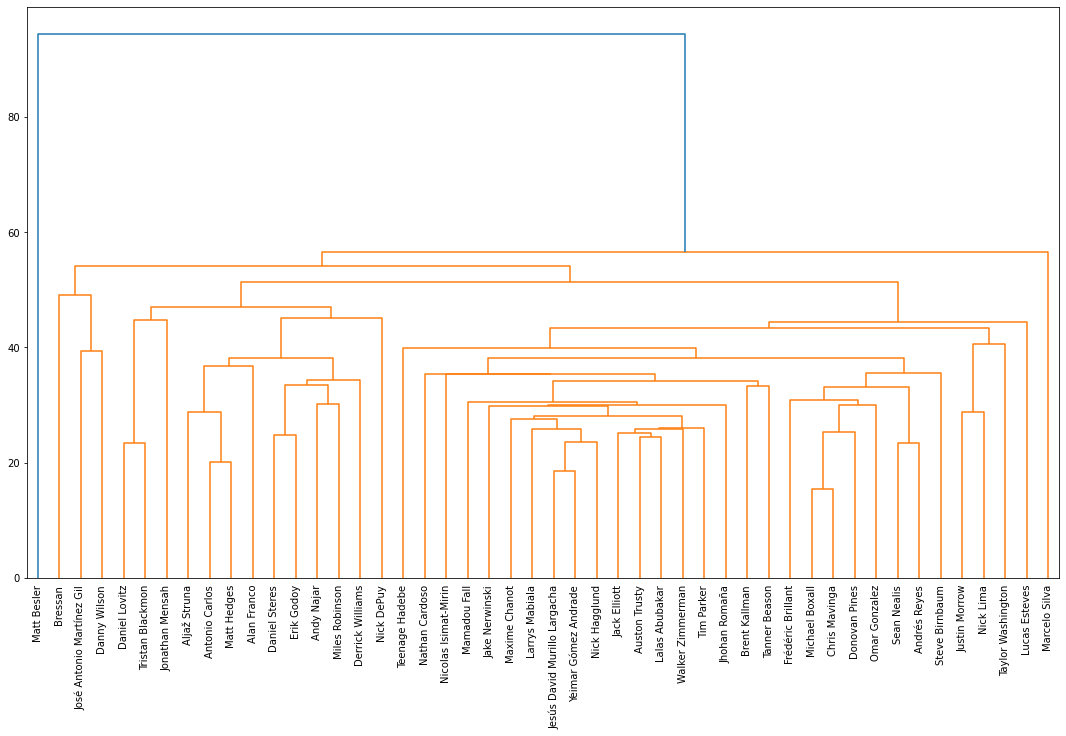

In [17]:


# Calculate the linkage: mergings
mergings = linkage(def_features,method='single',optimal_ordering=True)


# Plot the dendrogram

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
dendrogram(mergings,
           labels=names,
#             leaf_rotation=90,
           leaf_font_size=10,ax=ax)
plt.show()

In [27]:

# Use fcluster to extract labels: labels
labels = fcluster(mergings,30,criterion='distance')

labels
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'player': names})
df.sort_values(by='labels')

,labels,player
35,1,José Antonio Martínez Gil
23,2,Danny Wilson
18,3,Bressan
24,4,Tristan Blackmon
0,4,Daniel Lovitz
25,5,Jonathan Mensah
34,6,Aljaž Struna
33,6,Matt Hedges
28,6,Antonio Carlos
10,7,Alan Franco


In [ ]:
# offensive stats

Passes attempted
Short Pass Ratio; the % of passes played short
Cross Ratio; the % of crosses in total passes played
Dribbles
Touches in box
Forward Pass Ratio; the % of passes played forward
Length of short/medium pass
xA, or Expected Assists; the likeliness of a shot-assist ending up as a goal
Smart Passes; as defined by Wyscout, a smart pass is ‘for significative pass or smart pass in general. Something more than a simple pass, not so easy to be done. There has to be some idea in the pass, something creative, when the player is cutting the lines and winning some advantage for his teammates with this pass, leading them in good position to attack. The pass should be between 2–3 opposite players.’
Final Third to Forward Pass ratio; the % of forward passes played to the final third

In [13]:
mini = df[[
#     'player_name', 
           'pAdj_Tackles_and_Ints', 
       'pAdj_def_interceptions', 
    'pAdj_from_mish_tackles_won',
    
    'pAdj_Recoveries', 
#     'True_tackle_pct',
    'pAdj_Tackle_int_blocks'
]]

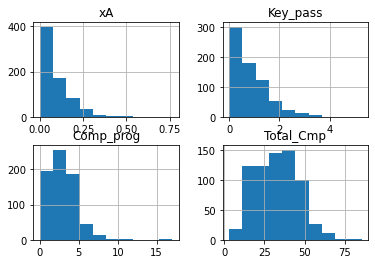

In [10]:
#  df[[
# #      'player_name', 
#            'pAdj_Tackles_and_Ints', 
#        'pAdj_def_interceptions', 
#     'pAdj_from_mish_tackles_won',
    
#     'pAdj_Recoveries', 
#     'True_tackle_pct',
# #     'pAdj_Tackle_int_blocks'
# ]].hist()

mini =  df[[
'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp',
]].hist()


mini =  df[[
'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp',
]]
mini = mini.iloc[:20]

In [20]:
 mini = df.iloc[:20][[
#      'player_name', 
           'pAdj_Tackles_and_Ints', 
       'pAdj_def_interceptions', 
    'pAdj_from_mish_tackles_won',
    
    'pAdj_Recoveries', 
    'True_tackle_pct',
#     'pAdj_Tackle_int_blocks'
]]

In [24]:
labels=df['player_name'][:20].values
labels

array(['Carles Gil', 'Julian Gressel', 'Emanuel Reynoso', 'Albert Rusnák',
       'Maximiliano Moralez', 'Luciano Acosta', 'Lucas Zelarayán',
       'Djordje Mihailovic', 'Brooks Lennon', 'Álvaro Medrán',
       'João Paulo Mior', 'Marcelino Moreno', 'Hany Mukhtar',
       'Jack Price', 'Yimmi Chará', 'Gustavo Bou', 'Lewis Morgan',
       'Mauricio Pereyra', 'Jesus Ferreira', 'Víctor Vázquez'],
      dtype=object)